In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
!pip install tensorflow-datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.3 MB 1.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.5/5.3 MB 1.4 MB/s eta 0:00:04
   ----- ---------------------------------- 0.8/5.3 MB 958.5 kB/s eta 0:00:05
   ------- -------------------------------- 1.0/5.3 MB 1.0 MB/s eta 0:00:05
   ------- -------------------------------- 1.0/5.3 MB 1.0 MB/s eta 0:00:05
   --------- ------------------------------ 1.3/5.3 MB 944.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.3/5.3 MB 944.7 kB/s eta 0:00:05
   ----------- 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Label: 4


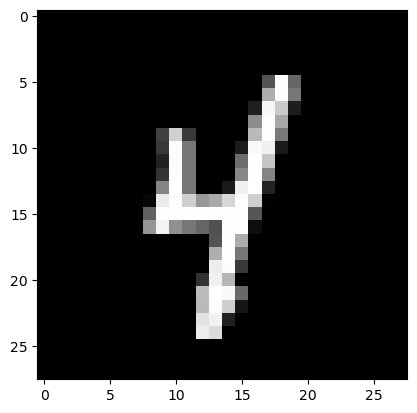

In [7]:
for mnist_example in mnist_train.take(1):
    image, label = mnist_example["image"], mnist_example["label"]
    
plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

In [9]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [11]:
mnist_train = mnist_train.repeat() .shuffle(1024) .batch(32)
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
info = mnist_builder.info
print (info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Chani\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [15]:
print (info.features)
print (info.features["label"] .num_classes)
print (info.features["label"] .names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [17]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print (info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Chani\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [19]:
fig = tfds.show_examples(info, mnist_test)

TypeError: 'DatasetInfo' object is not iterable

In [21]:
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [23]:
import tensorflow as tf
import numpy as np

In [25]:
num_classes = 10 
num_features = 784

learning_rate = 0.001
training_steps = 500
batch_size = 256
display_step = 100

In [27]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), \
x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255

In [29]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size)

In [31]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))
    
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
optimizer = tf.optimizers.SGD(learning_rate)

In [33]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = g.gradient(loss, [W, b])

    optimizer .apply_gradients(zip(gradients, [W, b])) 

In [35]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc)) 

step: 100, loss: 123.049194, accuracy: 0.882812
step: 200, loss: 104.171799, accuracy: 0.902344
step: 300, loss: 83.998672, accuracy: 0.910156
step: 400, loss: 83.909492, accuracy: 0.910156
step: 500, loss: 96.437637, accuracy: 0.902344


In [37]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test)) 

Test Accuracy: 0.912100


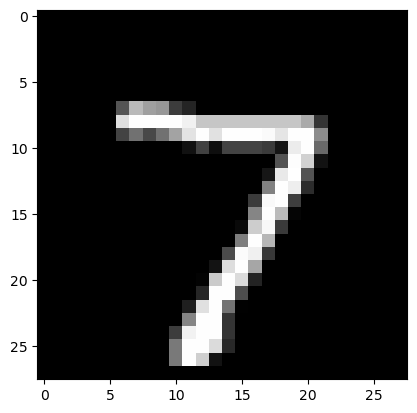

Model prediction: 7


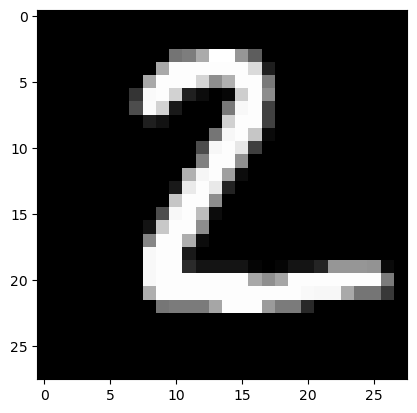

Model prediction: 2


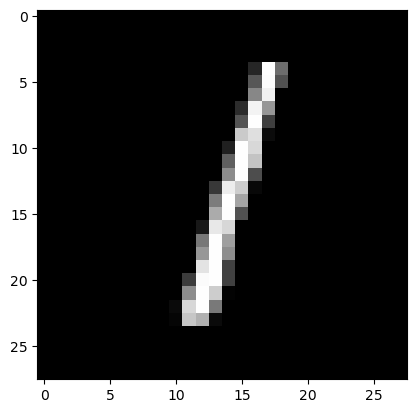

Model prediction: 1


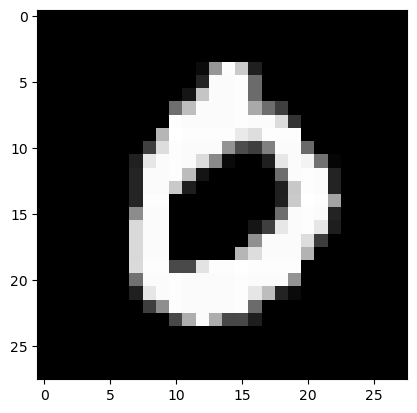

Model prediction: 0


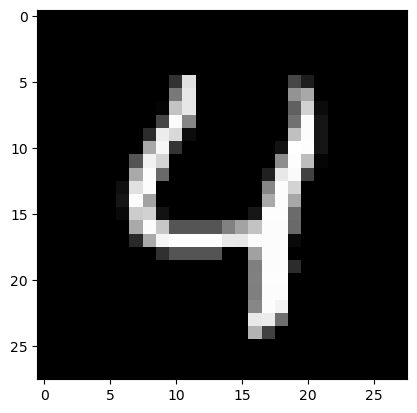

Model prediction: 4


In [39]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images) 

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions .numpy() [i] )) 